# Excercise: Happy or Sad Detection

In [1]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2020-05-24 23:53:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.200.144
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.200.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  1.73MB/s    in 1.5s    

2020-05-24 23:53:22 (1.73 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [3]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.1.0'

## Unzip the Data

In [6]:
import os
import zipfile

local_zip = '/tmp/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')

In [7]:
zip_ref.extractall('/tmp/happy-or-sad')
zip_ref.close()

In [11]:
os.listdir('/tmp/happy-or-sad/')

['happy', 'sad']

In [17]:
# Directory with Happy pictures
train_happy_dir = os.path.join('/tmp/happy-or-sad/happy/')
train_sad_dir = os.path.join('/tmp/happy-or-sad/sad/')

train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])
train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

In [19]:
print('Total Happy Training Images :: {}'.format(len(os.listdir(train_happy_dir))))
print('Total Sad Training Images :: {}'.format(len(os.listdir(train_sad_dir))))

Total Happy Training Images :: 40
Total Sad Training Images :: 40


In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

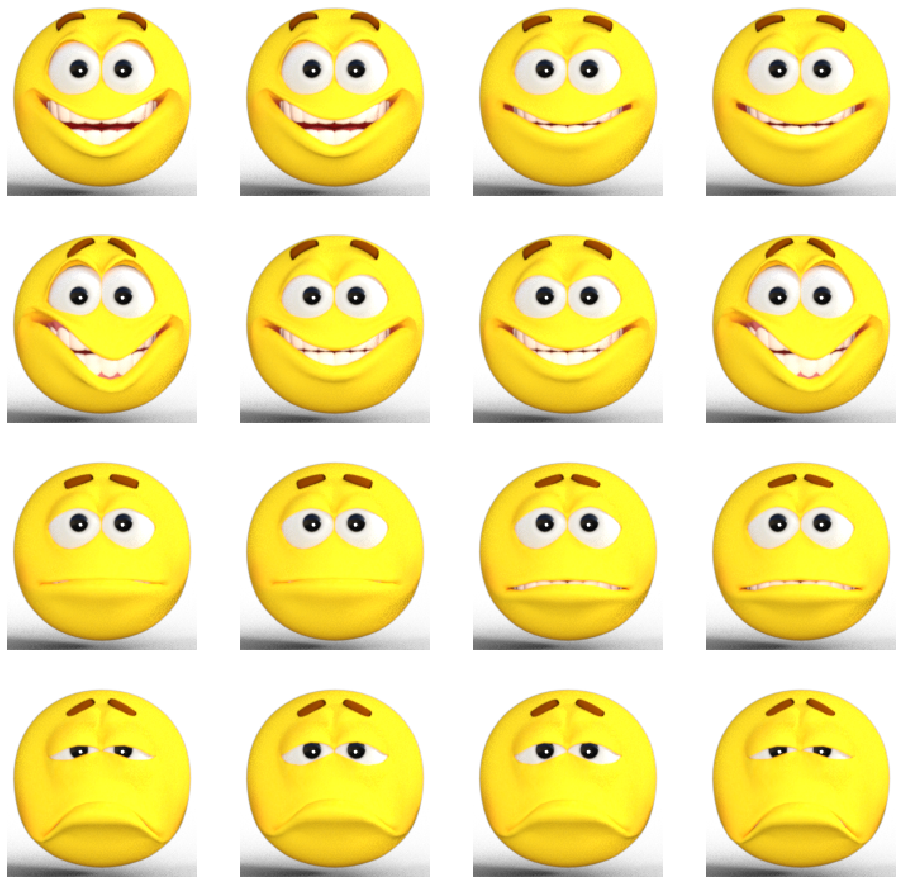

In [21]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Define a model

In [25]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                            tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                            tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=514,activation='relu'),
                            tf.keras.layers.Dense(units=1,activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 78400)            

In [27]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
class myCallBacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log={}):
        if log.get('accuracy')>0.998:
            print(' Hitting training accuracy of >.999, hence stopping training')
            self.model.stop_training=True

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)

In [31]:
train_generator = train_datagen.flow_from_directory('/tmp/happy-or-sad/',target_size=(300,300),class_mode='binary',batch_size=12)

Found 80 images belonging to 2 classes.


In [34]:
callbacks=myCallBacks()

In [32]:
history = model.fit(train_generator,steps_per_epoch=4,epochs=10,verbose=1)

  ...
    to  
  ['...']
Train for 4 steps
Epoch 1/10
4/4 [==============================] - 3s 775ms/step - loss: 9.5661 - accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 2s 614ms/step - loss: 0.5650 - accuracy: 0.7045
Epoch 3/10
4/4 [==============================] - 2s 625ms/step - loss: 0.6160 - accuracy: 0.6591
Epoch 4/10
4/4 [==============================] - 3s 625ms/step - loss: 0.4987 - accuracy: 0.7500
Epoch 5/10
4/4 [==============================] - 3s 639ms/step - loss: 0.7697 - accuracy: 0.5625
Epoch 6/10
4/4 [==============================] - 3s 632ms/step - loss: 0.2439 - accuracy: 0.9091
Epoch 7/10
4/4 [==============================] - 2s 623ms/step - loss: 0.1091 - accuracy: 0.9773
Epoch 8/10
4/4 [==============================] - 3s 642ms/step - loss: 0.0887 - accuracy: 0.9792
Epoch 9/10
4/4 [==============================] - 3s 645ms/step - loss: 0.0586 - accuracy: 0.9773
Epoch 10/10
4/4 [==============================] - 3s 630ms/step - loss: 0.